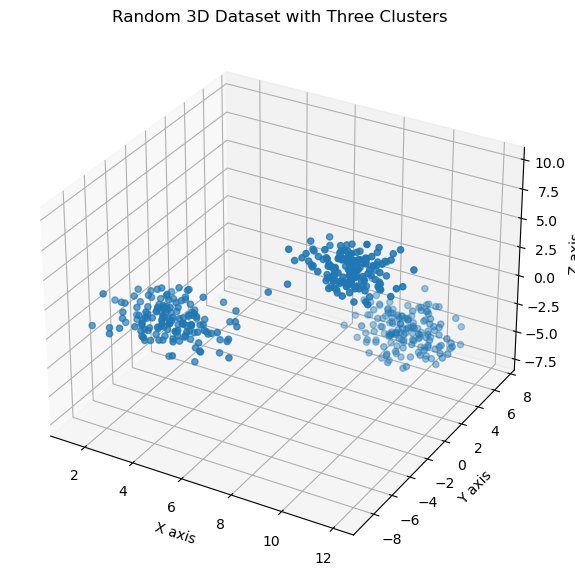

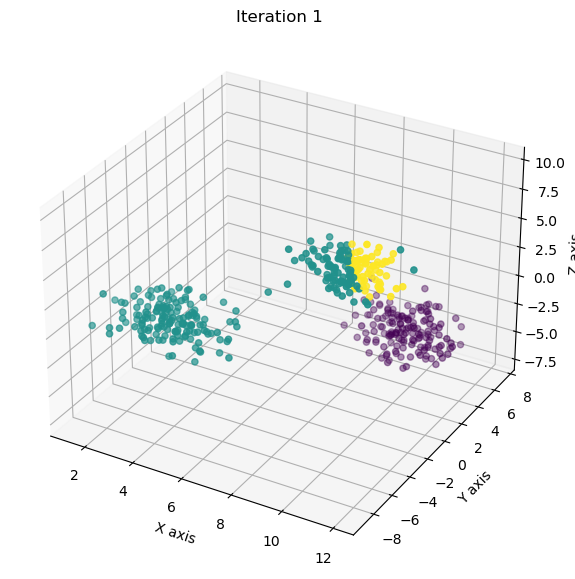

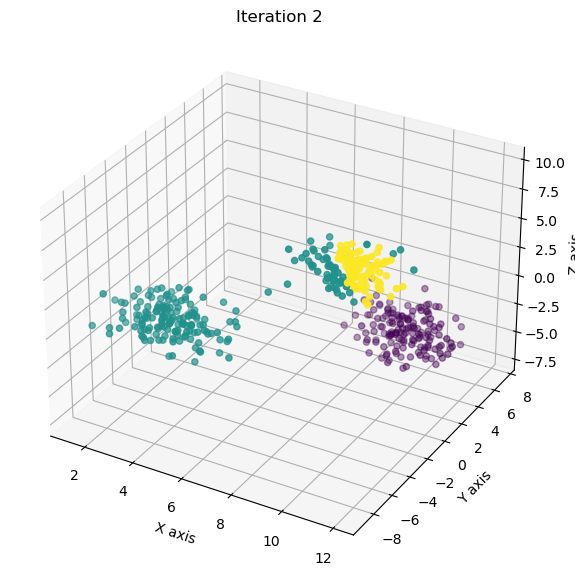

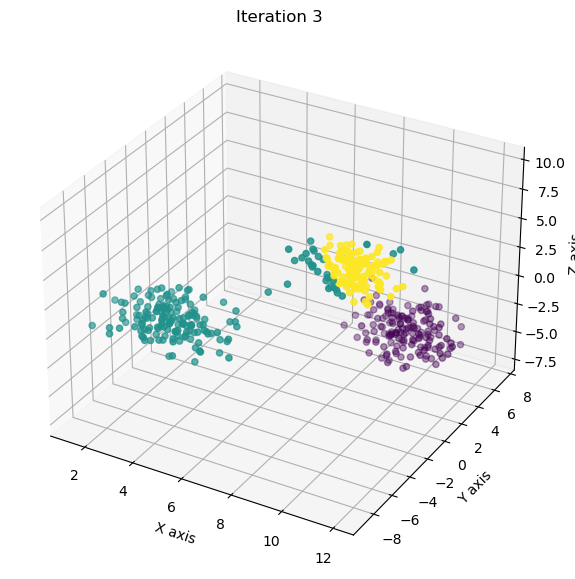

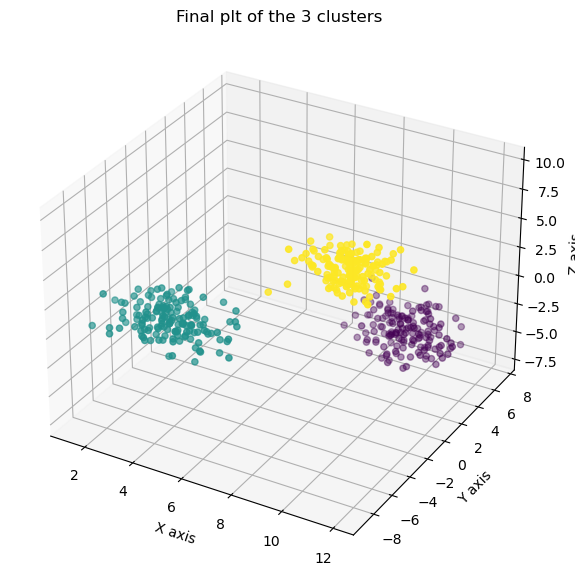

Converged?: True


In [23]:
# References: sklearn documents
# also ppt from class
# as well as https://www.kaggle.com/code/charel/learn-by-example-expectation-maximization/notebook
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings("ignore")
import random
import matplotlib.pyplot as plt
import numpy as np

# set SEED to BUID to get a consistant result
SEED = 8149
np.random.seed(SEED)
random.seed(SEED)
# Generating a random data set with 3 clusters
# referring to https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs
dataset,clusterLabel = make_blobs(n_samples=450, centers=3, n_features=3, cluster_std=1.0, random_state=SEED)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dataset[:, 0], dataset[:, 1], dataset[:, 2])
ax.set_title('Random 3D Dataset with Three Clusters')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

#Initialize the data to have 3 random centroids
# using 3 random points from data as the starting point

# Using max iter to be 1 to show the steps for each iteration of 
# E/M step
gmm = GaussianMixture(n_components=3, random_state=SEED,
 init_params = 'random_from_data',max_iter = 1,warm_start = True,verbose = 0)

# visualize first 3 steps of E/M
for i in range(1,4):
    gmm.fit(dataset)
    labels = gmm.predict(dataset)
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(dataset[:, 0], dataset[:, 1], dataset[:, 2], c=labels)
    ax.set_title('Iteration '+str(i))
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    plt.show()
for i in range(1,100):
    gmm.fit(dataset)
labels = gmm.predict(dataset)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dataset[:, 0], dataset[:, 1], dataset[:, 2], c=labels)
ax.set_title('Final plt of the 3 clusters')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()
print('Converged?:',gmm.converged_)